In [1]:
import numpy as np 
import pandas as pd 
ITERATION = 2

In [2]:
comps = np.load('./data/comps_%d.npy'%ITERATION)
Z2 = np.round(comps[:,0].reshape(-1,1))
Hepes = np.array(comps[:,1]).reshape(-1,1)
Z2M246I = np.array(comps[:,2]).reshape(-1,1)
Au = np.array(comps[:,3]).reshape(-1,1)
array = np.hstack((Hepes, Z2M246I, Au, Z2))
water = 280 - np.sum(array, axis=1).reshape(-1,1)
volume_array = np.hstack((water, array)).astype(int)
volume_df = pd.DataFrame(volume_array, columns=['Water', 'HEPES', 'Z2M246I', 'Au', 'Z2'])
volume_df

,Water,HEPES,Z2M246I,Au,Z2
0,99,72,32,0,75
1,153,35,6,32,52
2,129,75,0,0,75
3,87,64,53,0,75
4,129,0,75,0,75
...,...,...,...,...,...
82,129,0,75,75,0
83,204,0,0,75,0
84,81,0,75,75,48
85,129,75,75,0,0


In [21]:
flags = volume_df["Water"]>0

volume_df_pos = pd.DataFrame(volume_array[flags,:], columns=['Water', 'HEPES', 'Z2M246I', 'Au', 'Z2'])
volume_df_pos

,Water,HEPES,Z2M246I,Au,Z2
0,99,72,32,0,75
1,153,35,6,32,52
2,129,75,0,0,75
3,87,64,53,0,75
4,129,0,75,0,75
...,...,...,...,...,...
81,129,0,75,75,0
82,204,0,0,75,0
83,81,0,75,75,48
84,129,75,75,0,0


In [27]:
comps[flags,-1]

array([1.10000000e+01, 2.26007200e+00, 5.72653787e+00, 1.10000000e+01,
       1.10000000e-04, 1.10000000e-04, 8.55656037e+00, 1.10000000e+01,
       1.09889292e+01, 7.34592534e-01, 1.10000000e-04, 1.10000000e+01,
       1.10000000e-04, 1.57117168e+00, 1.10000000e-04, 7.41836403e+00,
       1.10000000e+01, 9.38111722e+00, 2.84702024e+00, 8.99117299e+00,
       1.10000000e-04, 1.09999703e+01, 7.10969776e+00, 1.10000000e-04,
       9.40649579e+00, 3.36914461e+00, 9.09261833e+00, 1.10000000e+01,
       7.93204648e+00, 1.10000000e-04, 8.72866138e+00, 1.10000000e-04,
       3.71609844e+00, 5.45338006e-04, 1.10000000e+01, 1.10000000e-04,
       6.41457048e+00, 1.10000000e-04, 1.10000000e-04, 1.10000000e+01,
       3.37906586e+00, 9.85146046e+00, 1.10000000e+01, 1.09999667e+01,
       1.10161925e-04, 1.10000000e+01, 1.09927044e+01, 4.57175514e+00,
       5.37262764e+00, 1.10000000e-04, 7.02865743e+00, 2.64540919e+00,
       1.10000000e-04, 1.10000000e+01, 7.00109327e+00, 1.10000000e-04,
      

In [28]:
n_samples = volume_df_pos.shape[0]
DT1 = np.zeros(n_samples).reshape(-1,1)
DT2 = np.zeros(n_samples).reshape(-1,1)
DT3 = np.zeros(n_samples).reshape(-1,1)
DT4 = np.round(comps[flags,-1].reshape(-1,1))
time_array = np.hstack((DT1, DT2, DT3, DT4)).astype(int)
time_df = pd.DataFrame(time_array, columns=['DT1', 'DT2', 'DT3', 'DT4'])
time_df

,DT1,DT2,DT3,DT4
0,0,0,0,11
1,0,0,0,2
2,0,0,0,6
3,0,0,0,11
4,0,0,0,0
...,...,...,...,...
81,0,0,0,0
82,0,0,0,0
83,0,0,0,0
84,0,0,0,11


/var/folders/84/z8kd1tl11hl96fsszww81rx40000gp/T/ipykernel_4832/2869521030.py:20: RuntimeWarning: invalid value encountered in divide
  volfracs = concentration/concentration.sum(axis=1)[:,np.newaxis]


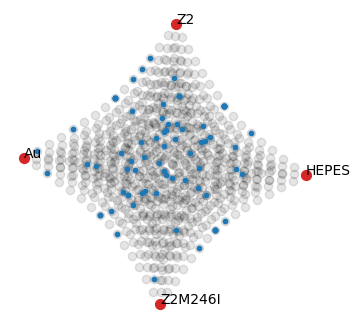

In [5]:
# plot the volumes in 2D projection 
import sys 
sys.path.append("/Users/pozzolabadmin/Documents/codebase/experiments/peptide_phase_mapping/04012024/6D")
from helpers import ManifoldGridViz
import matplotlib.pyplot as plt 

n = 15
inary = 4
viz = ManifoldGridViz(num_grid_samples=n, dim=inary)
viz.reduce() 

corners = np.eye(inary)
POS_CORNERS = np.asarray([viz.look_up(ci) for ci in corners])
POS_ZERO = viz.look_up(np.zeros(inary))
CORNER_NAMES = ["HEPES", "Z2M246I", "Au", "Z2"]
volumes = volume_df_pos.values[:,1:]
water = volume_df_pos.values[:,0]

concentration = volumes/water[:,np.newaxis]
volfracs = concentration/concentration.sum(axis=1)[:,np.newaxis]
pos_data = np.asarray([viz.look_up(xi) for xi in volfracs])  

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(viz.pos[:,0], viz.pos[:,1], color="k", alpha=0.1, edgecolors=None)
ax.scatter(pos_data[:,0], pos_data[:,1], s=10)
for i, cname in enumerate(CORNER_NAMES):
    ax.scatter(POS_CORNERS[i,0], POS_CORNERS[i,1], s=50, color='tab:red')
    ax.text(POS_CORNERS[i,0], POS_CORNERS[i,1], cname) 
ax.axis("off")
plt.show()

In [38]:
# comps_flagged = np.hstack((volume_df_pos.values[:,1:], time_df.values[:,-1].reshape(-1,1)))
# np.save("./data/comps_%d.npy"%ITERATION, comps_flagged)

## Save the data into csv files for Opentrons processing

In [6]:
# volume_df_pos.to_csv('./opentrons/volumes_%d.csv'%(ITERATION),index=False)
# time_df.to_csv('./opentrons/times_%d.csv'%(ITERATION),index=False)

In [7]:
# fig, axs = plt.subplots(1,4, figsize=(4*4, 4))
# num_zeros = np.asarray([(p==0).sum() for p in viz.grid])
# for i, ax in enumerate(axs):
#     ax.scatter(viz.pos[:,0], viz.pos[:,1], edgecolors=None, color="grey", alpha=0.05)
#     ax.scatter(viz.pos[num_zeros==i,0], viz.pos[num_zeros==i,1], edgecolors=None)
#     for j, cname in enumerate(CORNER_NAMES):
#         ax.scatter(POS_CORNERS[j,0], POS_CORNERS[j,1], s=50, color='tab:red')
#         ax.text(POS_CORNERS[j,0], POS_CORNERS[j,1], cname) 
#     ax.axis("off")
# plt.show()

In [8]:
# # plot unary, binary, ternary, and quaternary
# fig, axs = plt.subplots(1,4, figsize=(4*4, 4))
# for i, ax in enumerate(axs):
#     flags = viz.grid
#     ax.scatter(viz.pos[:,0], viz.pos[:,1], s= viz.grid[:,i]*50,edgecolors=None)
#     for j, cname in enumerate(CORNER_NAMES):
#         ax.scatter(POS_CORNERS[j,0], POS_CORNERS[j,1], s=50, color='tab:red')
#         ax.text(POS_CORNERS[j,0], POS_CORNERS[j,1], cname) 
#     ax.axis("off")
# plt.show()